<h1>Nama : Ricky Anggari
<h1>NIM : 2209106037
<h1>Kelas : A2'22

In [20]:
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score,classification_report

Pertama tama saya import semua library lalu gunakan .read_csv untuk membaca file csv

In [21]:

df=pd.read_csv("Weather Data.csv")
df2 = df
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


value counts untuk melihat berapa banyak data yang memiliki nama sama

In [22]:
df['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

Kemudian kita pilih jenis cuacanya

In [23]:
df2 = df[np.isin(df, ['Snow,Blowing Snow','Thunderstorms,Rain Showers']).any(axis=1)]

Kemudian tentukan x dan y nya,misal disini saya ambil temperatur dan kecepatan anginnya

In [24]:
data_x_1 = 'Temp_C'
data_x_2 = 'Wind Speed_km/h'
data_y = df2['Weather']

Masukkan data datanya ke X dan y

In [25]:
X = df2[[data_x_1, data_x_2]]
y = data_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Kemudian kita akan melakukan scalling dan encoding

In [26]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [27]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [28]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

Lalu buat variabel baru untuk SVC/Support Vector Classifier

In [29]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

Untuk melihat Akurasi,kita mula mula lakukan prediksi

In [30]:
y_pred = svm.predict(X_test) 

Lalu kita gunakan accuracy score untuk y test dan y pred nya

In [31]:
print("accuracy score menggunakan SVM =",accuracy_score(y_test,y_pred,),'\n')
print(classification_report(y_test,y_pred))

accuracy score menggunakan SVM = 0.9090909090909091 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.88      0.93         8

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



Lalu disini saya membuat confusion matriks nya untuk meliha true false dan positive negativenya

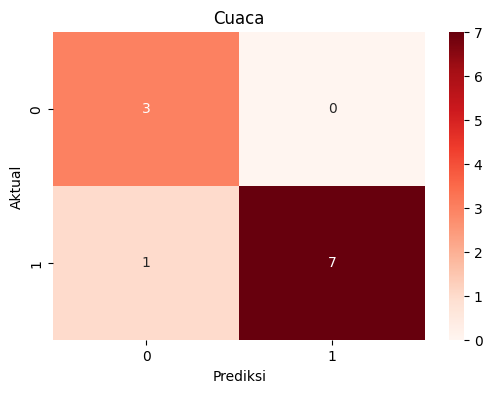

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Reds")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Cuaca')
plt.show()

Kemudian saya buat scatterplot untuk melihat plot titik titiknya

C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

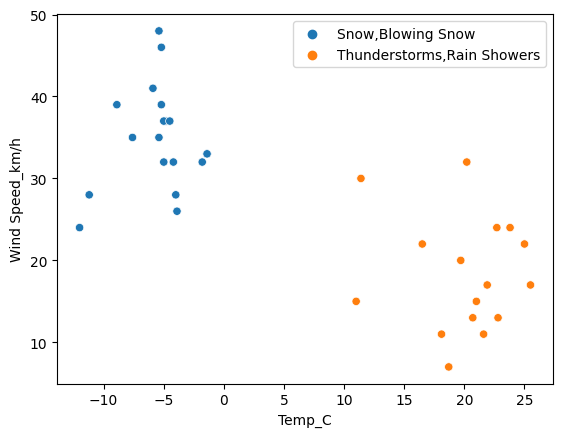

In [33]:
sns.scatterplot(x=data_x_1, y=data_x_2, hue=data_y, data=df)
plt.legend()
plt.show()

Setelah itu,untuk membuat KMeans,jangan lupa import kmeans nya dari sklearn.cluster

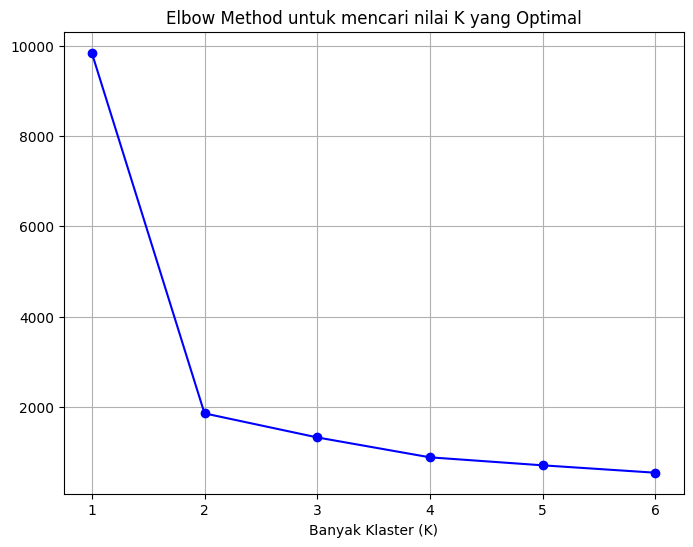

In [34]:

from sklearn.cluster import KMeans
X = df2[[data_x_1, data_x_2]]
wcss = []
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.grid(True)
plt.show()

Setelah itu,kita lihat centroid centroid kmeans nya,disini K saya hanya 2

C:\Users\Nitro\AppData\Local\Temp\ipykernel_10212\1513940857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Cluster"] = cluster_labels
C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages

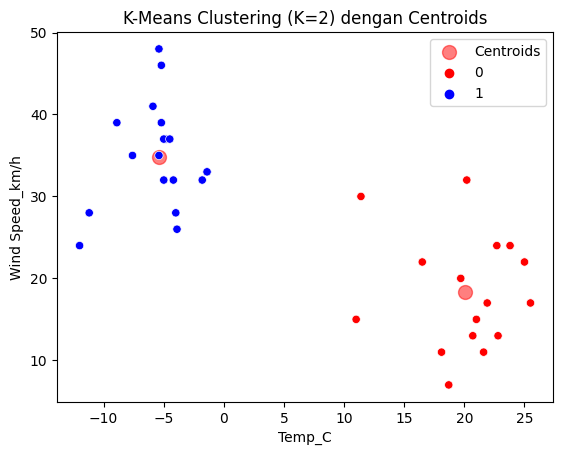

In [35]:
from sklearn.cluster import KMeans
X = df2[[data_x_1, data_x_2]].values 
K = 2
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
df2["Cluster"] = cluster_labels 
centroids = kmeans.cluster_centers_ 
warna = ["red", "blue"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,label='Centroids')
sns.scatterplot(x=data_x_1, y=data_x_2, hue="Cluster", data=df2, palette=warna)
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.legend()
plt.show()

Kemudian untuk melihat unlabeled dataset,import silhouette score,DB Index dan CH index dari sklearn.metrics,kemudian dari situ kita bisa melihat seberapa bagus hasilnya

In [36]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.70
Davies-Bouldin Index: 0.42
Calinski-Harabasz Index: 142.53


Sekarang giliran menggunakan labeled dataset,kita akan melihat ART,NMI,Homogenity,Completeness score dan VMeasure

In [37]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score # HCV-M
cross_tab = pd.crosstab(df2["Cluster"], df2["Weather"])
print("Cross-Tabulation:")
print(cross_tab, "\n")
ari = adjusted_rand_score(df2["Weather"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
true_labels_num = df2["Weather"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
homogeneity = homogeneity_score(df2["Weather"], cluster_labels)
completeness = completeness_score(df2["Weather"], cluster_labels)
v_measure = v_measure_score(df2["Weather"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
Weather  Snow,Blowing Snow  Thunderstorms,Rain Showers
Cluster                                               
0                        0                          16
1                       19                           0 

Adjusted Rand Index (ARI): 1.00
Normalized Mutual Information (NMI): 1.00
Homogeneity Score: 1.00
Completeness Score: 1.00
V-Measure Score: 1.00


Dan yang terakhir saya akan menampilkan scatterplot

C:\Users\Nitro\AppData\Local\Temp\ipykernel_10212\2761614668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, "Cluster2"] = df2["Cluster"].map(cluster_mapping)
C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nitro\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nitro\AppData\Roaming\P

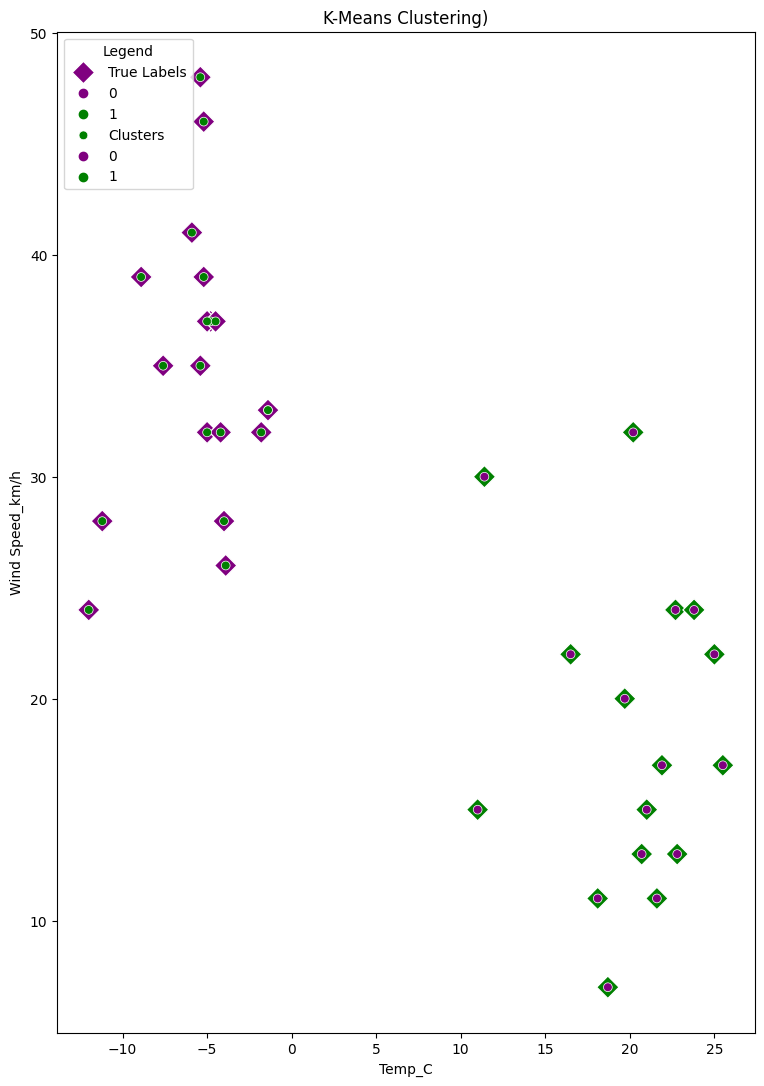

In [38]:
cluster_mapping = {0: 1, 1: 0} 
df2.loc[:, "Cluster2"] = df2["Cluster"].map(cluster_mapping)
plt.figure(figsize=(9, 13))
warna = ["purple", "green"]
sns.scatterplot(x=data_x_1, y=data_x_2, data=df2, palette=warna, hue="Cluster2", marker="D", s=130, label="True Labels")
sns.scatterplot(x=data_x_1, y=data_x_2, data=df2, hue="Cluster", palette=warna, marker="o", s=40, label="Clusters")
plt.title("K-Means Clustering)")
plt.legend(title="Legend", loc="upper left")
plt.show()
